In [1]:
#import thư viện cần dùng cho bài toán
import pandas as pd 
import numpy as np

from sklearn.cluster import KMeans 
from sklearn import metrics

import seaborn as sns 
import plotly as py 
import plotly.graph_objs as go 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#đọc dữ liệu từ file csv
df = pd.read_csv("C:/Users/HOANG NAM/Desktop/titanic.csv")

In [3]:
#hiển thị 20 phần tử đầu trong dataset
df.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [4]:
# Hiển thị thông tin dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [5]:
df = df.drop(['name'],axis=1)
df = df.drop(['ticket'],axis=1)
df = df.drop(['boat'],axis=1)
df = df.drop(['body'],axis=1)
df = df.drop(['home.dest'],axis=1)

In [6]:
for dataset in [df]:
    dataset['relatives'] = dataset['sibsp'] + dataset['parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1 
    
df['not_alone'].value_counts()

1.0    790
0.0    519
Name: not_alone, dtype: int64

In [7]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

for dataset in [df]:
    dataset['cabin'] = dataset['cabin'].fillna("U0")
    dataset['deck'] = dataset['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['deck'] = dataset['deck'].map(deck)
    dataset['deck'] = dataset['deck'].fillna(0)
    dataset['deck'] = dataset['deck'].astype(int)
# we can now drop the cabin feature
df = df.drop(['cabin'], axis=1)

In [8]:
for dataset in [df]:
    mean = df["age"].mean()
    std = df["age"].std()
    is_null = dataset["age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["age"] = age_slice
    dataset["age"] = df["age"].astype(int)
df["age"].isnull().sum()

0

In [9]:
df['embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [10]:
common_value = 'S'
for dataset in [df]:
    dataset['embarked'] = dataset['embarked'].fillna(common_value)

In [11]:
for dataset in [df]:
    dataset['fare'] = dataset['fare'].fillna(0)
    dataset['fare'] = dataset['fare'].astype(int)

In [12]:
genders = {"male": 0, "female": 1}
for dataset in [df]:
    dataset['sex'] = dataset['sex'].map(genders)

In [13]:
df

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck
0,1.0,1.0,1.0,29,0.0,0.0,211,S,0.0,1.0,2
1,1.0,1.0,0.0,0,1.0,2.0,151,S,3.0,0.0,3
2,1.0,0.0,1.0,2,1.0,2.0,151,S,3.0,0.0,3
3,1.0,0.0,0.0,30,1.0,2.0,151,S,3.0,0.0,3
4,1.0,0.0,1.0,25,1.0,2.0,151,S,3.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,1.0,42,1.0,0.0,14,C,1.0,0.0,8
1306,3.0,0.0,0.0,26,0.0,0.0,7,C,0.0,1.0,8
1307,3.0,0.0,0.0,27,0.0,0.0,7,C,0.0,1.0,8
1308,3.0,0.0,0.0,29,0.0,0.0,7,S,0.0,1.0,8


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['embarked'])
df['embarked'] = le.transform(df['embarked'])

In [15]:
df

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck
0,1.0,1.0,1.0,29,0.0,0.0,211,2,0.0,1.0,2
1,1.0,1.0,0.0,0,1.0,2.0,151,2,3.0,0.0,3
2,1.0,0.0,1.0,2,1.0,2.0,151,2,3.0,0.0,3
3,1.0,0.0,0.0,30,1.0,2.0,151,2,3.0,0.0,3
4,1.0,0.0,1.0,25,1.0,2.0,151,2,3.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,1.0,42,1.0,0.0,14,0,1.0,0.0,8
1306,3.0,0.0,0.0,26,0.0,0.0,7,0,0.0,1.0,8
1307,3.0,0.0,0.0,27,0.0,0.0,7,0,0.0,1.0,8
1308,3.0,0.0,0.0,29,0.0,0.0,7,2,0.0,1.0,8


In [16]:
df = df.drop(labels=1309, axis=0)

In [17]:
df.astype(int)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck
0,1,1,1,29,0,0,211,2,0,1,2
1,1,1,0,0,1,2,151,2,3,0,3
2,1,0,1,2,1,2,151,2,3,0,3
3,1,0,0,30,1,2,151,2,3,0,3
4,1,0,1,25,1,2,151,2,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1,14,1,0,14,0,1,0,8
1305,3,0,1,42,1,0,14,0,1,0,8
1306,3,0,0,26,0,0,7,0,0,1,8
1307,3,0,0,27,0,0,7,0,0,1,8


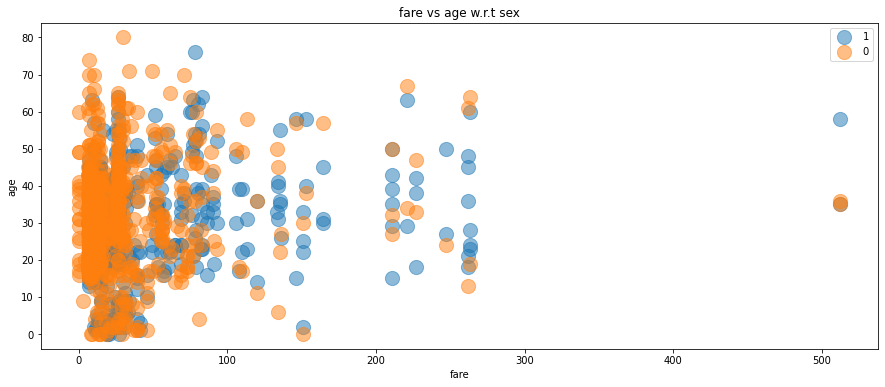

In [18]:
#Hiển thị phân bố của fare và age theo sex
plt. figure(1, figsize = (15, 6)) 
for sex in [1, 0]: 
    plt.scatter(x = 'fare', y = 'age', data = df[df['sex'] == sex],
                s = 200, alpha = 0.5, label = sex) 
plt.xlabel('fare'), plt.ylabel('age') 
plt.title('fare vs age w.r.t sex') 
plt.legend() 
plt.show()

In [19]:
x1 = df[['fare', 'age']].iloc[:, :].values 
inertia = [] 
for n in range(1, 20):
    algorithm = KMeans (n_clusters = n, init='random') 
    algorithm.fit(x1) 
    inertia.append(algorithm.inertia_)

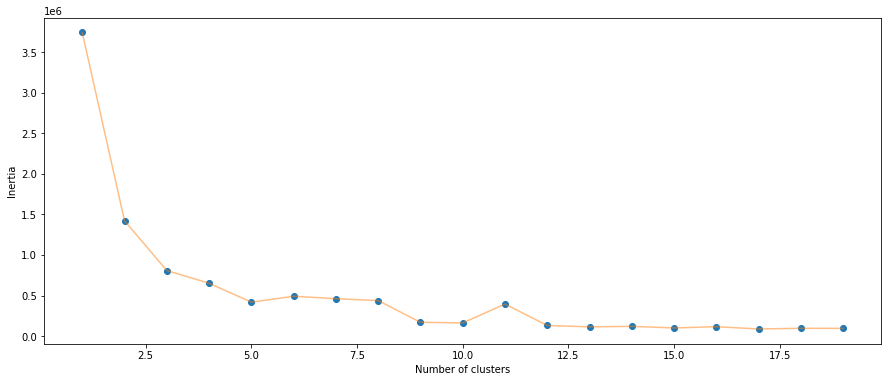

In [20]:
#Hiển thị giá trị Intertia trên biểu đồ
plt.figure(1, figsize = (15, 6)) 
plt.plot(np.arange(1, 20), inertia, 'o') 
plt.plot(np.arange(1 , 20), inertia, '-', alpha = 0.5) 
plt.xlabel('Number of clusters'), plt.ylabel('Inertia') 
plt.show()

In [46]:
# Tạo mô hình KMeans với số cụm là 10
algorithm = KMeans(n_clusters = 10, random_state = 0) 
algorithm.fit(x1) 
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

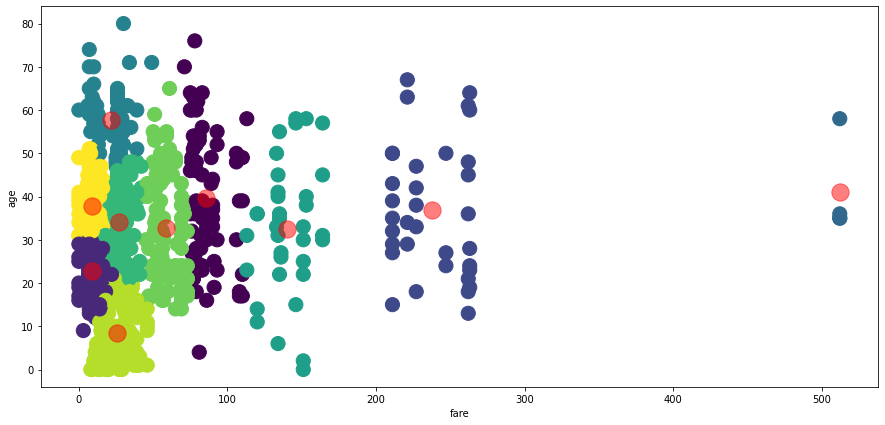

In [47]:
plt.figure(1, figsize = (15, 7)) 
plt.clf() 
plt.scatter(x = 'fare', y = 'age', data = df, c = labels1,
            s = 200) 
plt.scatter(x = centroids1[:, 0], y = centroids1[: , 1], s = 300, c = 'red', alpha = 0.5) 
plt.ylabel('age'), plt.xlabel('fare') 
plt.show()

In [48]:
#Hệ số dáng điệu để đánh giá kết quả gom cụm
metrics.silhouette_score(x1, labels1, metric = 'euclidean')

0.45008801663804765